--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Mengxi Wang](https://github.com/Mengxi-20)

# Replication of Chen, T., Kung, J. K. S., & Ma, C. (2020) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Chen, T., Kung, J. K. S., & Ma, C. (2020). Long Live Keju! The Persistent Effects of China’s Civil Examination System. The Economic Journal, 130(631), 2030–2064. 

##### Downloading and viewing this notebook:


* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-Mengxi-20). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-Mengxi-20) on GitHub).

* The original paper, as well as the data and code provided by the authors can be accessed [here](https://academic.oup.com/ej/article/130/631/2030/5819954).


##### Information about replication and individual contributions:

* 

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Identification" data-toc-modified-id="2.-Identification-2">2. Identification</a></span></li><li><span><a href="#3.-Empirical-Setup" data-toc-modified-id="3.-Empirical-Setup-3">3. Empirical Setup</a></span></li><li><span><a href="#4.-Replication-of-Chen-et-al.-(2020)" data-toc-modified-id="4.-Replication-of-Chen-et-al.-(2020)-4">4. Replication of Chen et al. (2020)</a></span><ul class="toc-item"><li><span><a href="#4.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="4.1.-Data-&amp;-Descriptive-Statistics-4.1">4.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#4.2.-Keju and Distance to the Printing Ingredients" data-toc-modified-id="4.2.-Keju and Distance to the Printing Ingredients-4.2">4.2. Keju and Distance to the Printing Ingredients</a></span><ul class="toc-item"><li><span><a href="#4.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="4.2.1.-Tests-of-the-Validity-of-the-RD-Approach-4.2.1">4.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-4.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-4.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#4.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="4.2.2.-First-Year-GPAs-and-Academic-Probation-4.2.4">4.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#4.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="4.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">4.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#4.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="4.2.4.-The-Impact-onSubsequent-Performance-4.2.6">4.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-4.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-4.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#4.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="4.2.5.-The-Impacts-on-Graduation-4.2.9">4.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="5.-Extension:-Robustness-Checks-5">5. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#5.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="5.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-5.1">5.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#5.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="5.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-5.1.1">5.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#5.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="5.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-5.1.2">5.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#5.2.-Bandwidth-Sensitivity" data-toc-modified-id="5.2.-Bandwidth-Sensitivity-5.2">5.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#6.-Conclusion" data-toc-modified-id="6.-Conclusion-6">6. Conclusion</a></span></li><li><span><a href="#7.-References" data-toc-modified-id="7.-References-7">7. References</a></span></li></ul></div>

</a></span><ul class="toc-item"><li><span><a href="#5.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="5.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-5.1">5.1.  A Closer Look at Students' Subsequent Performance.</a></span>

Measuring the Impact of Keju on Contemporary Human Capital Outcomes

In [74]:
%matplotlib inline
!pip install linearmodels
!pip install graphviz
!pip install stargazer
!pip install FixedEffectModel

In [75]:
import sys
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp, seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api

In [76]:
from linearmodels.iv import IV2SLS
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE, PanelOLS
from statsmodels.datasets import longley
from linearmodels.panel import compare
from IPython.display import HTML, Image
from stargazer.stargazer import Stargazer
from statsmodels.iolib.summary2 import summary_col
from string import ascii_letters
from FixedEffectModel.api import *

---
# 1. Introduction 
---

Chen et. al. (2020) examined the effects of China’s civil examination system (keju), a long-lived institution, on human capital outcome todays. Becoming dominant during the Song dynasty (c. 960–1276), Keju is the earliest elite selection system in the world that aims to recruit talents to serve in the bureaucracy. Since Jinshi is the highest honor and qualification in this civil exam, passing the highest level of the exam and receiving the honor of Jinshi means generous pecuniary rewards and a promising future. Over time, the civil examination system formed a distinct group of local elites with deep respect for learning and academic achievements. This cultural characteristic still exists, even a long time after the abolition of the imperial examination system.

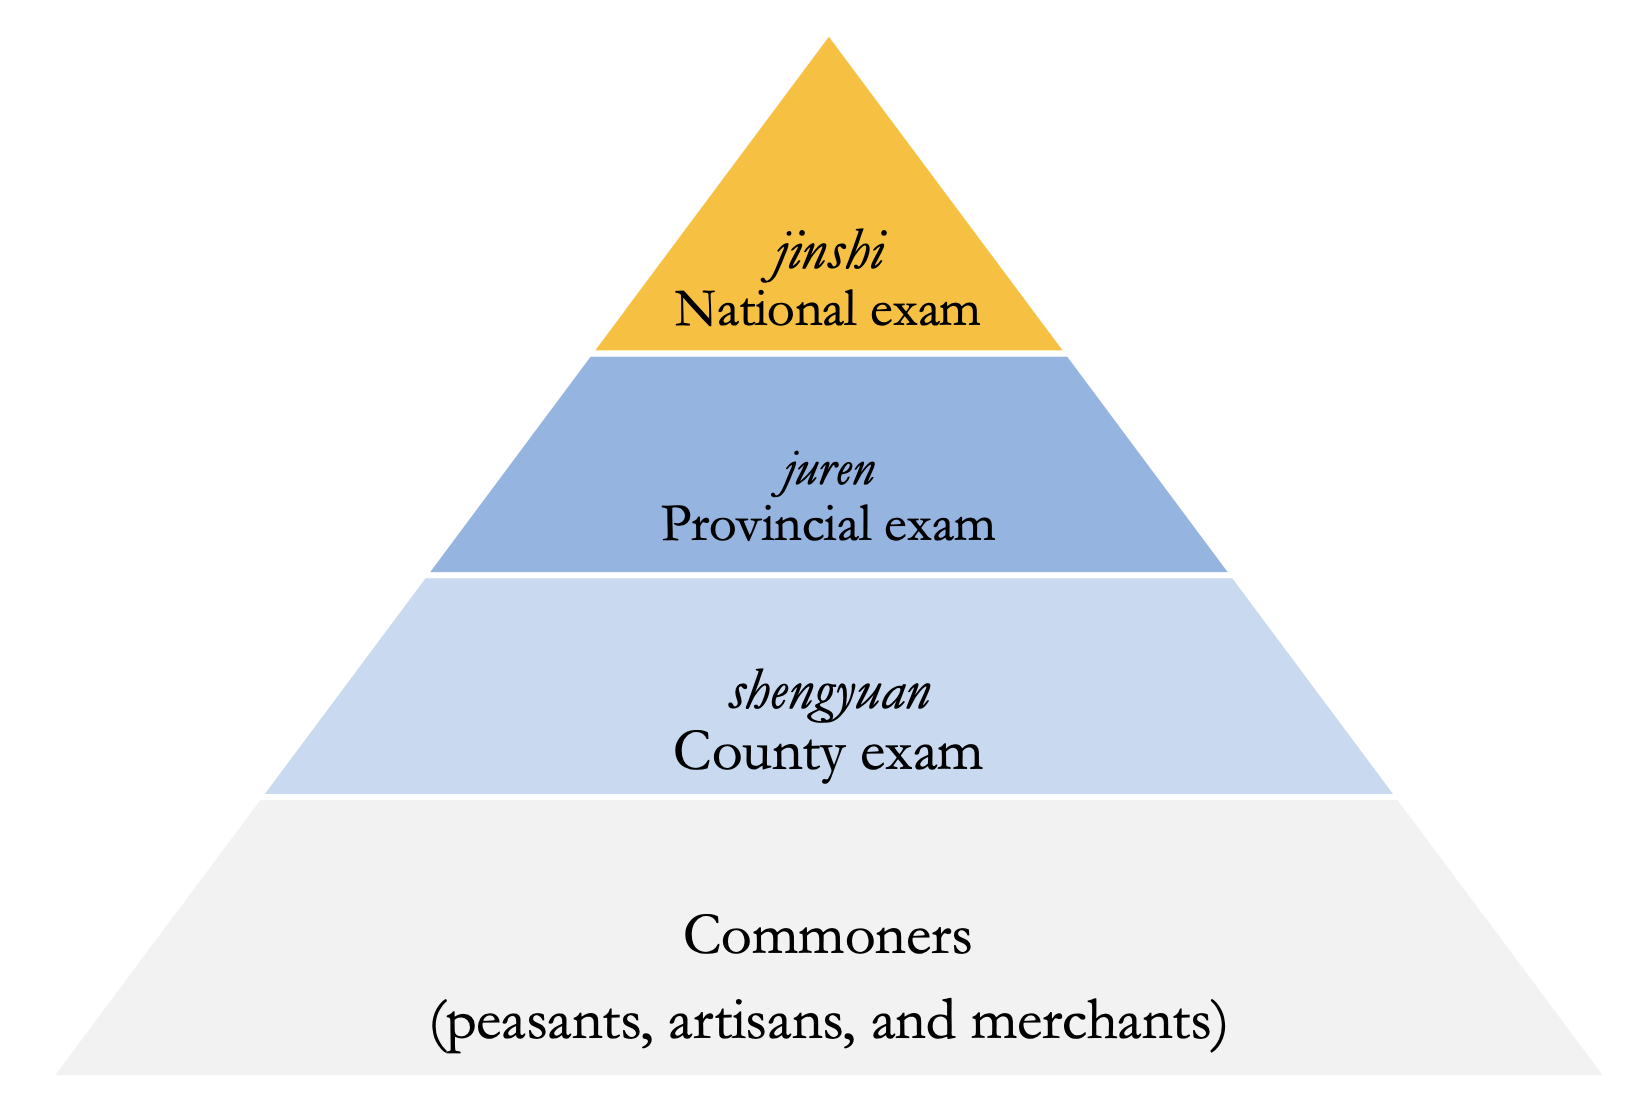

In [77]:
Image("/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/Keju Hierarchy.png",width = 500)

To verify the causal relationship between keju and contemporary human capital outcome, Chen et. al. (2020) introduce an **instrumental variable (IV)** - Distance to the Printing Ingredients (Pine and Bamboo) to tackle the issues of omitted variables bias. The IV is motivated by the idea that to become a winner in the Keju exam, apart from the limited textbooks, the candidates still need a large cluster of reference books, which explain nuances of texts and teach tricks of writing essay. That is why printing ingredients play such an important role in the Keju exam. At the end, Chen et. al. (2020) present the causality and compare OLS and TSLS using different control variables.

This notebook is structured as follows: In the next section the identification strategy is analyzed, then the empirical strategy that the authors use for estimation is briefly discussed. The fourth and the fifth section, as the core of this notebook, show the replication of main results of the paper and try to solve possible problems with weak instruments, xxx and xxx. The sixth section offers some concluding remarks.

---
# 2. Identification
---

In their paper Chen et. al. (2020) aim to verify whether the relationship between Keju and contemporary human capital outcome is causal. However, performance i.e. Jinshi density of various prefectures may be related to many complicated factors. So the estimates of contemporary human capital outcomes to Keju are likely to suffer from omitted variables — variables that are simultaneously associated with both historical jinshi density and years of schooling today. Unobserved factors, like natural or genetic endowments, may be associated with prefectures that had produced more jinshi. Natural or genetic endowments are hard to measure and therefore it is not possible to control them when estimating the impact of Keju to contemporary human capital outcomes. Thus, an omitted variable bias might occur. 

Chen’s approach to avoid bias is now to employ an instrumental variable approach which is based on the accuracy of the causal graph below.

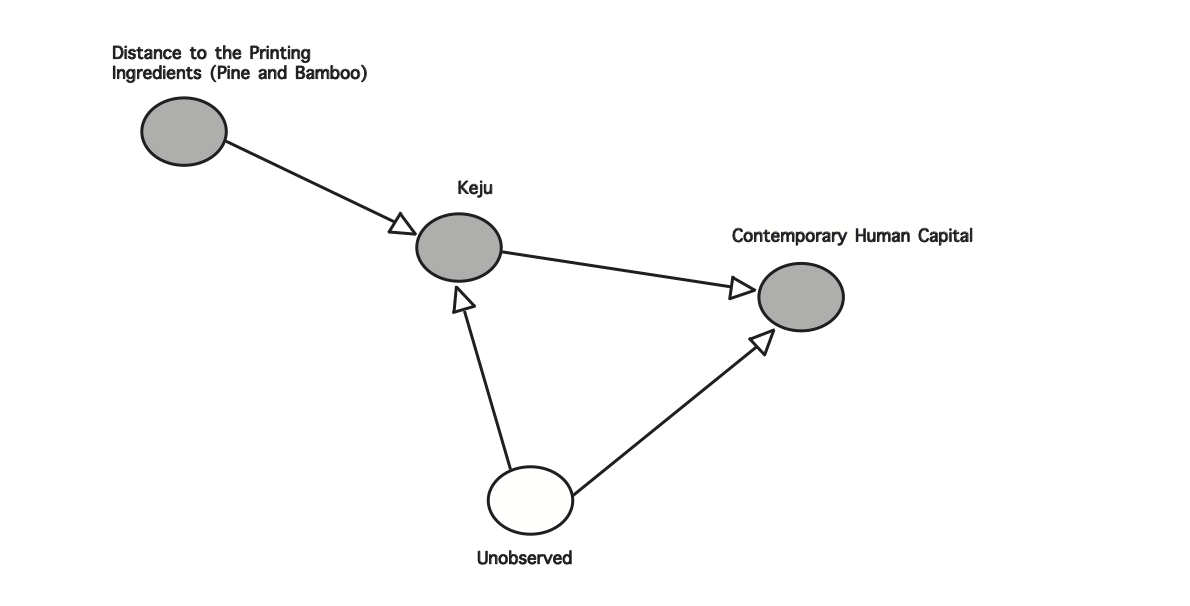

In [78]:
Image("files/causal graph.png", width = 700)

Chen et. al. (2020) examine the effects of China’s civil examination system using data from the Ming-Qing period (c. 1368–1905). In such a context, the printing technology in China relied mainly on pine and bamboo for producing ink and paper. Typically, the printing centers were located near to the pine and bamboo habitats to reduce the transport costs. Besides, for geographical reasons, the transportation of raw materials i.e. pine and bamboo products was mostly finished via waterways. 

Therefore, an instrumental variable is constructed using a prefecture’s shortest river distance to its nearest sites of pine and bamboo — the two key ingredients required for producing ink and paper in woodblock printing. The following is the logic that why this instrumental variable is feasible and reasonable. 

* To some extent, the performance of various Chinese prefectures in the Keju exam is closely related to the convenience of printing and obtaining books, not only textbooks but also reference books. 

* The main printing centers were located in close to the producing areas of pine and bamboo. 

* The raw materials needed for printing were mainly transported by water via the main river branches. 

Since the geographic distributions of pine and bamboo forests are random, the exogeneity assumption of the instrumental variable holds. 

If instead of a prefecture’s shortest river distance to its nearest sites of pine and bamboo, the shortest distance to printing centers is directly employed as the instrumental variable, there might be problems of exclusion restriction, because the locations of printing centers were not exogenously determined. For example, they were more likely to be located in economically prosperous and densely populated areas. 


---
# 3. Empirical Setup
---

The authors examined the impact of keju on contemporary human capital outcomes. For the regression analysis Chen et. al. (2020) employ the following model to do the estimation:

\begin{equation}
y_{i} = \beta keju_{i} + \gamma_{1} X^{c}_{i} + \gamma_{2} X^{h}_{i} + \alpha_{p} + \epsilon_{i},
\end{equation}


* $i$ indexes a prefecture,
* $y_{i}$ stands for the contemporary human capital measure constructed from the 2010 population census,
* $\alpha_{p}$ denotes province fixed effects,
* $\epsilon_{i}$ is the error term,
* $keju_{i}$ is a measure of the degree of success in civil exams of prefecture i in the Ming and Qing dynasties, specifically measured by the total number of candidates who obtained the jinshi degree in the keju exam in that prefecture during the entire Ming-Qing period (c. 1371–1905),
* $X^{c}_{i}$ denotes a vector of baseline control variables, which are likely to impact upon the years of schooling today, including night-time lights and key features of geography,
* $X^{h}_{i}$ denotes a vector of historical variables, which are likely correlated with jinshi density while also bearing upon contemporary human capital outcomes, including historical economic prosperity and regional migration.

Key variables in the data sets:


In [79]:
file_path = 'files/Abb_1.txt'
with open(file_path) as file_abb_1:
    data = file_abb_1.read()
print(data)

lneduyear       Average years of schooling (logged)
lnjinshipop     Jinshi density (logged)
lnnspop         Share of population with no education (×100, logged)
lnmppop         Share of population with elementary and secondary school education (×100, logged)
lnhighpop       Share of population with high school education (×100, logged)
lnunipop        Share of population with university and above (×100, logged)
lnnightlight    Night-time lights in 2010 (logged)
lncoastdist     Distance to coast (1,000 km, logged)
tri             Terrain ruggedness
suitability     Agricultural suitability
lnpopdensity    Population density (logged)
urbanrates      Urbanisation rates
provid          Province fixed effects


---
# 4. Replication of Ting Chen, James Kai-sing Kung and Chicheng Ma (2020)
---

## 4.1. Data & Descriptive Statistics


To obtain the data of key explanatory variable — $keju_{i}$, Chen et. al. (2020) filtered data from Official Directory of Ming-Qing Civil Exam Graduates. After sorting out the jinshi degrees obtained in the 242 civil exams that took place between 1371 and 1904, the authors normalized the number of jinshi by the prefecture population (in units of 10,000).

Furthermore, in order to reduce skewness, they raised the number of jinshi density to the natural log. At the end, the authors add 1 to the number of jinshi, i.e., ln(1 + jinshi/population), in case of losing observations with a value of zero. The processed data named jinshi density are used to measure the historical success in China’s civil exam (Keju).

Besides, the data of dependent variable — $y_{i}$, come from the 2010 Chinese Family Panel Survey (CFPS). “Average years of schooling" in the census was selected and raised to the natural log to measure the contemporary human capital. 

As for control variables $X^{c}_{i}$ and $X^{h}_{i}$ , they are constructed as follows. 

The vector of baseline control variables — $X^{c}_{i}$:

| Baseline controls | Construction | Comments | 
| :--- | :--- | :--- |
| Night-time lights | the average satellite light density at night time in 2010 at the prefectural level | Measuring the contemporary economic prosperity | 
| geography 1: distance to coast | the distance between a prefecture’s centroid to the closest point on the coast | prefectures located on the coast were likely early beneficiaries of Western technology, knowledge and trade | 
| geography 2: terrain ruggedness | the difference in elevation between adjacent cell grids using data provided by the United States Geographic Service (USGS) | terrain ruggedness can have a profoundly lasting effect on long-term economic development either through its direct impact or through its interaction with key historical events | 


The vector of historical variables — $X^{h}_{i}$:

| Historical controls | Construction | Comments | 
| :--- | :--- | :--- |
| historical economic prosperity 1: population density | the average population density between 1393 and 1910 | / | 
| historical economic prosperity 2: urbanisation | the average share of the urban population between 1393 and 1920 | / | 
| historical economic prosperity 3: agricultural suitability | yields of crops suitable for cultivation after 1500 based on the Caloric Suitability Indices (Galor and Ozak, 2016) | China was still predominantly an agricultural economy in the Ming-Qing period. | 
| Regional migration | the 1,370 jinshi (2.65%) whose birthplace was different from the place of examination are excluded from the analysis | migration may affect development if prefectures with a proven track record in civil exams attracted candidates to migrate to these places. | 



The following tables show the descriptive statistics. Table_1 and Table_2 provide a basic feel for the data in front of us. Table_3 provides an overview of data for the main variables, which will be used later in the empirical analysis. 

In [80]:
data = pd.read_csv('data/census20_final.csv')
data = pd.DataFrame(data)

In [81]:
pd.__version__

'1.3.0'

In [82]:
# Table 1
Table_1 = data.describe()
Table_1

,provid,prefid,year,lneduyear,lnjinshipop,lnjinshipopm,lnnspop,lnmppop,lnhighpop,lnunipop,...,noise491,noise492,noise493,noise494,noise495,noise496,noise497,noise498,noise499,noise500
count,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,...,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000,$274.000
mean,$40.573,"$406,766.058","$2,010.000",$2.160,$0.917,$0.678,$1.639,$4.268,$2.594,$0.878,...,$0.263,$0.230,$-0.232,$-0.182,$-0.350,$0.115,$0.165,$0.210,$-0.287,$-0.273
std,$13.294,"$133,168.486",$0.000,$0.118,$0.701,$0.337,$0.587,$0.107,$0.316,$0.653,...,$1.072,$1.159,$1.057,$1.113,$1.070,$0.948,$1.084,$1.106,$1.117,$0.996
min,$11.000,"$110,000.000","$2,010.000",$1.726,$0.000,$0.000,$-0.301,$3.764,$1.646,$-0.954,...,$-2.195,$-2.722,$-2.684,$-3.503,$-3.541,$-2.488,$-3.819,$-3.019,$-3.508,$-2.567
25%,$34.000,"$341,025.000","$2,010.000",$2.102,$0.524,$0.459,$1.269,$4.232,$2.421,$0.451,...,$-0.447,$-0.550,$-0.924,$-0.919,$-1.053,$-0.423,$-0.602,$-0.482,$-1.120,$-0.970
50%,$42.000,"$420,750.000","$2,010.000",$2.170,$0.789,$0.666,$1.604,$4.291,$2.621,$0.780,...,$0.215,$0.216,$-0.213,$-0.108,$-0.406,$0.110,$0.252,$0.313,$-0.279,$-0.469
75%,$51.000,"$510,975.000","$2,010.000",$2.231,$1.054,$0.903,$2.007,$4.336,$2.819,$1.129,...,$0.970,$1.021,$0.454,$0.496,$0.369,$0.651,$1.003,$0.934,$0.385,$0.415
max,$64.000,"$640,400.000","$2,010.000",$2.460,$3.959,$2.669,$3.388,$4.436,$3.257,$3.006,...,$3.587,$3.366,$3.209,$2.267,$2.788,$2.881,$2.614,$3.339,$2.663,$2.787


In [83]:
# Table 2
Table_2 = data.head()
Table_2

,provid,prefid,year,lneduyear,lnjinshipop,lnjinshipopm,lnnspop,lnmppop,lnhighpop,lnunipop,...,noise491,noise492,noise493,noise494,noise495,noise496,noise497,noise498,noise499,noise500
0,11,110000,2010,$2.460,$3.525,$0.949,$0.659,$3.764,$3.097,$3.006,...,$0.735,$-0.204,$-0.051,$-2.307,$0.107,$0.642,$0.264,$-0.616,$-1.747,$-0.972
1,12,120000,2010,$2.340,$3.715,$1.090,$0.925,$4.054,$3.071,$2.248,...,$0.487,$0.209,$-0.086,$-1.169,$0.165,$0.563,$-0.849,$-1.224,$-0.677,$-0.351
2,13,130100,2010,$2.292,$0.740,$0.646,$1.068,$4.174,$2.912,$1.687,...,$0.523,$0.108,$-1.773,$0.142,$1.391,$1.054,$-0.644,$0.111,$0.028,$-0.756
3,13,130200,2010,$2.234,$0.629,$0.569,$0.986,$4.278,$2.762,$1.264,...,$0.732,$0.213,$-0.454,$-2.234,$0.493,$0.574,$1.347,$0.958,$-1.401,$-0.757
4,13,130300,2010,$2.265,$0.768,$0.695,$0.779,$4.242,$2.769,$1.703,...,$1.665,$-0.181,$-0.234,$-2.346,$0.215,$0.411,$0.779,$0.380,$-1.339,$0.523


In [84]:
def table_sum_stats(data):
    
    variables = data[
        [
            "lneduyear",
            "lnjinshipop",
            "lnnightlight",
            "lncoastdist",
            "tri",
            "suitability",
            "lnpopdensity",
            "urbanrates",
            "lnprint",
            "pcenter",
            "bprvdist",
            "rvrdist",
        ]
    ]

    table = pd.DataFrame()
    table["Observation"] = variables.count()
    table["Mean"] = variables.mean()
    table["Standard Deviation"] = variables.std()
    table["min"] = variables.min()
    table["max"] = variables.max()
    table = table.astype(float).round(3)
    table["Description"] = [
            "Average years of schooling (logged)",
            "Jinshi density (logged)",
            "Night-time lights in 2010 (logged)",
            "Distance to coast (1,000 km, logged)",
            "Terrain ruggedness",
            "Agricultural suitability",
            "Population density (logged)",
            "Urbanisation rates",
            "Printed books (logged)",
            "Printing centre",
            "Shortest river distance to pine/bamboo (km, logged)",
            "Shortest distance to major navigable rivers (km, logged)",
    ]
    

    return table

In [85]:
# Table 3
table_3 = table_sum_stats(data)
table_3

,Observation,Mean,Standard Deviation,min,max,Description
lneduyear,$274.000,$2.160,$0.118,$1.726,$2.460,Average years of schooling (logged)
lnjinshipop,$274.000,$0.917,$0.701,$0.000,$3.959,Jinshi density (logged)
lnnightlight,$274.000,$0.722,$1.246,$-4.072,$3.482,Night-time lights in 2010 (logged)
lncoastdist,$274.000,$12.608,$1.175,$9.731,$14.698,"Distance to coast (1,000 km, logged)"
tri,$274.000,$0.207,$0.175,$0.005,$0.821,Terrain ruggedness
suitability,$274.000,$3.008,$0.716,$0.550,$4.838,Agricultural suitability
lnpopdensity,$274.000,$2.188,$0.992,$-1.297,$4.153,Population density (logged)
urbanrates,$274.000,$0.051,$0.035,$0.000,$0.307,Urbanisation rates
lnprint,$274.000,$2.024,$1.621,$0.000,$6.987,Printed books (logged)
pcenter,$274.000,$0.069,$0.255,$0.000,$1.000,Printing centre


In [86]:
def plot_distribution(data, variable):
    
    plot=plt.figure(figsize=(8,8))
    plot=plt.xlim(1,2.5)
    plot=plt.xlabel(variable)
    plot=plt.ylabel('Count')
    plot=sns.histplot(data[variable])
    
    return plot

2.1604706138686143

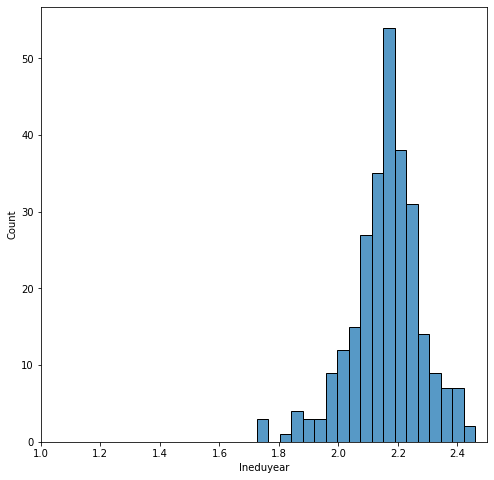

In [87]:
plot_distribution(data, "lneduyear")
data["lneduyear"].mean()

## 4.2. Keju and Distance to the Printing Ingredients


As mentioned before, an instrumental variable approach is employed. In order to convincingly pursue the identification strategy outlined above, it is necessary to establish an effect of distance to printing ingredients on jinshi density and to argue that the distance is exogenous to any unobserved factor affecting both jinshi density and contemporary human capital. 

Chen et. al. (2020) constructed the IV using historical GIS data on the major inland rivers from Harvard CHGIS. They computed a prefecture’s shortest river distances to its nearest bamboo and pine forests and then took the average of the two distances as the instrumental variable. The IV data is directly given and named bprdist.

Now, the three conditions for a valid instrument are discussed. The first requirement for IV to be valid holds, as it is clearly observable that distance to printing ingredients has an effect on jinshi density. Examination can be found in Table 4. Below is the diagonal correlation matrix of independent variable, instrumental variable and other relevent variables.

In [88]:
file_path = '/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/Abb_2.txt'
with open(file_path) as file_abb_1:
    abb2 = file_abb_1.read()
print(abb2)

lnprint         Printed books (logged)
pcenter         Printing centre
bprvdist        Shortest river distance to pine/bamboo (km, logged)
rvrdist         Shortest distance to major navigable rivers (km, logged)


<AxesSubplot:>

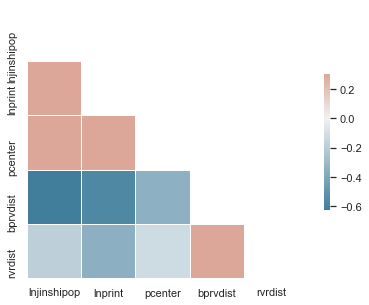

In [89]:
sns.set_theme(style="white")
df = data[
        [
            "lnjinshipop",
            "lnprint",
            "pcenter",
            "bprvdist",
            "rvrdist",
        ]
    ]
df = pd.DataFrame(df)

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As for the second requirement, Chen argues that the geographic distribution of pine and bamboo forests is random in nature and hence not correlated with any other unobserved variables (exogenous). The exogeneity assumption of the instrumental variable also holds. 

The importance of pine and bamboo for printing and accordingly a prefecture’s success in the civil exam is examed as follows in Table 4. In column(1) and column(2), by regressing jinshi density on the number of printed books, it is found that they are highly significant. In column(3) and column(4), river distance to the pine and bamboo - the main printing ingredients is significantly correlated with the existence of main printing center in a prefecture. In column(5) and column(6), river distance to printing ingredients is significantly correlated with the number of printed books. In column(7) and column(8), the IV - river distance to pine/bamboo is negatively and significantly correlated with jinshi density. In summary, these results confirm the assumed importance of pine and bamboo in determining the availability of reference books and a prefecture's success in the Keju exams, which is measured by Jinshi density. 

In [90]:
# Table 4 
# final version
provid = pd.Categorical(data.provid)

data['provid'] = provid
data = data.set_index(['provid','year'])

exog_vars = ['lnprint']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_1 = mod.fit()


exog_vars = ['lnprint','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_effects=True)


exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.pcenter,exog,entity_effects=True)
res_fe_3 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.pcenter,exog,entity_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnprint,exog,entity_effects=True)
res_fe_5 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnprint,exog,entity_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_7 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_effects=True)

print(compare({"(1)jinshi density_log": res_fe_1, "(2)jinshi density_log": res_fe_2, "(3)printing center": res_fe_3, "(4)printing center": res_fe_4}, stars = True, precision = "std_errors"))


print(compare({"(5)printed books_log": res_fe_5, "(6)printed books_log": res_fe_6, "(7)jinshi density_log": res_fe_7, "(8)jinshi density_log": res_fe_8}, stars = True, precision = "std_errors"))


/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                                             Model Comparison                                            
                        (1)jinshi density_log (2)jinshi density_log (3)printing center (4)printing center
---------------------------------------------------------------------------------------------------------
Dep. Variable                     lnjinshipop           lnjinshipop            pcenter            pcenter
Estimator                            PanelOLS              PanelOLS           PanelOLS           PanelOLS
No. Observations                          274                   274                274                274
Cov. Est.                          Unadjusted             Clustered          Clustered          Clustered
R-squared                              0.1322                0.2876             0.0662             0.0795
R-Squared (Within)                     0.0000                0.0000             0.0000             0.0000
R-Squared (Between)                    0.1189 

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/results.py:1022: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  1,


The third condition that IV needs to satisfy is exclusion restriction, in other words, the IV only affects the outcome Y through affecting the endogenous regressor X. For exclusion restrictions, little evidence shows that pine and bamboo were intentionally planted for the purpose of commercial printing (Elvin, 2004). Even the most successful wood merchants in Huizhou prefecture of Anhui Province preferred to lumber trees from primordial forests rather than planting on their own (Li, 2000). The locations of pine and bamboo forests are therefore uncorrelated with other omitted variables — most notably economic prosperity (including population density and urbanisation rate of a prefecture), which may be correlated with years of schooling today. 

Last but not least, Chen et. al. (2020) is confident that the IV does not have a direct effect on the contemporary development of the publishing industry and possibly economic prosperity as in the case of Europe, because the traditional Chinese woodblock printing was gradually replaced by the new printing technology in the late 20th century, which means that pine and bamboo as raw materials of printing technology stepped off the history stage. So, river distance to printing ingredients only affects comtemporary human capital through affecting jinshi density.

## 4.3. Measuring the Impact of Keju on Contemporary Human Capital Outcomes

### 4.3.1. Baseline OLS estimates


By plotting correlation between jinshi density (number of jinshi, normalised by their population) and average years of schooling in 2010 in the following figure, it is obvious that there is a strong positive relationship between logged jinshi density and logged average years of schooling, i.e. between a prefecture’s success in the civil exam and contemporary human capital outcomes. So, it is necessary to continue to dig into their relationship. 


/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


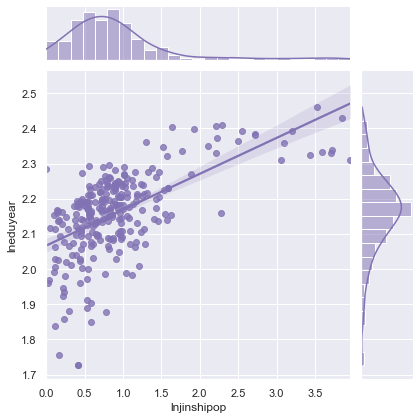

In [91]:
sns.set(style="darkgrid")
g = sns.jointplot("lnjinshipop", "lneduyear", 
                   data=data, kind="reg",
                   color="m", height=6)

We begin by using the number of jinshi normalised by a prefecture’s population (jinshi density) as our key independent variable and regressing average schooling years on the jinshi density to check the the baseline ordinary least squares (OLS) results. Table 5 shows the OLS results without province fixed effect to provide a benchmark. To make the estimation more accurate, we then add province fixed effect on years of schooling into the model - results can be found in Table 6.

In Table 6, column(1) shows the result which is only controlled for province fixed effect and can be regarded as a benchmark. On the basis of column (2), the baseline controls are added into column (2), and the historical controls are further added into column(3). 

In both column(1) and column(2), the acquirement of jinshi honor has a highly significant (at the 1% level) and positive effect on years of schooling. In column(3), the result suggests that for every 10,000 people, a doubling of jinshi density is associated with an increase in years of schooling in 2010 of 6.9%. This is not a small number regarding the huge geographic variations in jinshi density across historical China. In other words, given that the mean of schooling year today is 8.712, a doubling of jinshi density leads to an increase of average schooling years by 0.6 in 2010. This result is robust to the inclusion of a rich gamut of covariates including a prefecture’s economic prosperity both in the Ming-Qing period (population density, urbanisation rate and agricultural suitability) and today (using night-time lights in 2010 as proxy), and not the least geography (terrain ruggedness and distance to coast), all with province fixed effects.

In [92]:
# Table 5

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

result1 = smf.ols('lneduyear ~ lnjinshipop', data = data).fit()
result2 = smf.ols('lneduyear ~ lnjinshipop + lnnightlight + lncoastdist + tri', data = data).fit()
result3 = smf.ols('lneduyear ~ lnjinshipop + lnnightlight + lncoastdist + tri + suitability + lnpopdensity + urbanrates', data = data).fit()

sum = summary_col([result1, result2, result3], stars = True)
print(sum)



               lneduyear I lneduyear II lneduyear III
-----------------------------------------------------
Intercept      2.0667***   1.9978***    2.0257***    
               (0.0094)    (0.0675)     (0.0649)     
R-squared      0.3682      0.5999       0.6678       
R-squared Adj. 0.3659      0.5939       0.6591       
lncoastdist                0.0087       0.0136***    
                           (0.0053)     (0.0050)     
lnjinshipop    0.1022***   0.0677***    0.0711***    
               (0.0081)    (0.0072)     (0.0068)     
lnnightlight               0.0363***    0.0506***    
                           (0.0056)     (0.0057)     
lnpopdensity                            -0.0518***   
                                        (0.0082)     
suitability                             0.0050       
                                        (0.0069)     
tri                        -0.1696***   -0.2963***   
                           (0.0361)     (0.0407)     
urbanrates                 

In [93]:
# Table 6

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

provid = pd.Categorical(data.provid)

data['provid'] = provid
data = data.set_index(['provid','year'])

exog_vars = ['lnjinshipop']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lneduyear,exog,entity_effects=True)
res_1 = mod.fit()

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lneduyear,exog,entity_effects=True)
res_2 = mod.fit()

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lneduyear,exog,entity_effects=True)
res_3 = mod.fit(cov_type = 'clustered',cluster_effects=True)

print(compare({"(1)": res_1, "(2)": res_2, "(3)": res_3}, stars = True, precision = "std_errors"))



                          Model Comparison                          
                                   (1)            (2)            (3)
--------------------------------------------------------------------
Dep. Variable                lneduyear      lneduyear      lneduyear
Estimator                     PanelOLS       PanelOLS       PanelOLS
No. Observations                   274            274            274
Cov. Est.                   Unadjusted     Unadjusted      Clustered
R-squared                       0.4041         0.5584         0.5937
R-Squared (Within)              0.0000         0.0000         0.0000
R-Squared (Between)             0.4725         0.6875         0.7468
R-Squared (Overall)             0.3644         0.5259         0.5960
F-statistic                     166.16         76.498         49.896
P-value (F-stat)                0.0000         0.0000         0.0000
=====================     ============   ============   ============
const                        2.076

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/results.py:1022: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  1,


### 4.3.2. TSLS

In [94]:
# Table 7
# 2.stage result

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)
mod = 'lneduyear ~ 1 + lnnightlight + lncoastdist + tri + suitability + lnpopdensity + urbanrates + [lnjinshipop ~ bprvdist]'
reg = IV2SLS.from_formula(mod, data).fit(cov_type = 'robust')
print (reg)

## 重要的是lnjinshipop前面的系数0.0957，std.err.是0.0132，在1%的水平上显著，论文结果是0.085

                          IV-2SLS Estimation Summary                          
Dep. Variable:              lneduyear   R-squared:                      0.6516
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6424
No. Observations:                 274   F-statistic:                    395.59
Date:                Thu, Jul 15 2021   P-value (F-stat)                0.0000
Time:                        15:01:17   Distribution:                  chi2(7)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        2.0245     0.0612     33.066     0.0000      1.9045      2.1446
lnnightlight     0.0461     0.0073     6.336

In [95]:
# Table 8
# 1.stage result
print(reg.first_stage)

## 重要的是bprvdist前面的系数-0.0723，论文结果是−0.085

    First Stage Estimation Results    
                           lnjinshipop
--------------------------------------
R-squared                       0.4731
Partial R-squared               0.3070
Shea's R-squared                0.3070
Partial F-statistic             65.654
P-value (Partial F-stat)     5.551e-16
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                       1.4737
                              (3.4804)
lnnightlight                    0.1120
                              (2.8473)
lncoastdist                     0.0028
                              (0.0914)
tri                             1.1996
                              (4.0962)
suitability                    -0.1942
                             (-4.4868)
lnpopdensity                    0.1194
                              (2.4428)
urbanrates                      2.4051
                              (2.0478)
bprvdist                       -0.0723
                         

In [96]:
# Table 9

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

provid = pd.Categorical(data.provid)

data['provid'] = provid
data = data.set_index(['provid','year'])

data

prefid  lneduyear  lnjinshipop  lnjinshipopm  lnnspop  lnmppop  \
provid year                                                                   
11     2010  110000     $2.460       $3.525        $0.949   $0.659   $3.764   
12     2010  120000     $2.340       $3.715        $1.090   $0.925   $4.054   
13     2010  130100     $2.292       $0.740        $0.646   $1.068   $4.174   
       2010  130200     $2.234       $0.629        $0.569   $0.986   $4.278   
       2010  130300     $2.265       $0.768        $0.695   $0.779   $4.242   
...             ...        ...          ...           ...      ...      ...   
63     2010  632300     $1.726       $0.420        $0.388   $3.332   $4.090   
       2010  632500     $1.839       $0.116        $0.111   $3.062   $4.191   
64     2010  640200     $2.232       $0.786        $0.770   $1.336   $4.256   
       2010  640300     $2.108       $0.453        $0.423   $1.955   $4.335   
       2010  640400     $1.984       $1.111        $0.974   $2.617   $4.265   

             lnhighpop  lnunipop  lnnightlight  lncoastdist  ...  noise491  \
provid year                                                  ...             
11     2010     $3.097    $3.006        $2.758      $11.917  ...    $0.735   
12     2010     $3.071    $2.248        $2.705      $11.317  ...    $0.487   
13     2010     $2.912    $1.687        $1.926      $12.531  ...    $0.523   
       2010     $2.762    $1.264        $2.258      $10.976  ...    $0.732   
       2010     $2.769    $1.703        $1.649      $10.814  ...    $1.665   
...                ...       ...           ...          ...  ...       ...   
63     2010     $1.808    $0.710       $-2.379      $14.337  ...   $-1.566   
       2010     $1.939    $0.663       $-1.464      $14.456  ...   $-1.375   
64     2010     $2.781    $1.078        $1.847      $13.772  ...   $-0.026   
       2010     $2.374    $0.497        $0.982      $13.814  ...    $0.361   
       2010     $2.271    $0.661        $0.555      $13.858  ...    $0.625   

             noise492  noise493  noise494  noise495  noise496  noise497  \
provid year                                                               
11     2010   $-0.204   $-0.051   $-2.307    $0.107    $0.642    $0.264   
12     2010    $0.209   $-0.086   $-1.169    $0.165    $0.563   $-0.849   
13     2010    $0.108   $-1.773    $0.142    $1.391    $1.054   $-0.644   
       2010    $0.213   $-0.454   $-2.234    $0.493    $0.574    $1.347   
       2010   $-0.181   $-0.234   $-2.346    $0.215    $0.411    $0.779   
...               ...       ...       ...       ...       ...       ...   
63     2010    $0.383   $-1.477   $-0.886    $0.439    $0.247    $0.323   
       2010   $-0.053    $0.441   $-0.451   $-0.958    $0.252   $-0.285   
64     2010   $-0.051    $0.458    $1.335   $-0.085    $2.127    $0.256   
       2010    $0.887    $1.660    $0.783   $-0.357    $0.049    $0.072   
       2010   $-0.803    $1.381   $-1.597    $1.546   $-0.394   $-1.267   

             noise498  noise499  noise500  
provid year                                
11     2010   $-0.616   $-1.747   $-0.972  
12     2010   $-1.224   $-0.677   $-0.351  
13     2010    $0.111    $0.028   $-0.756  
       2010    $0.958   $-1.401   $-0.757  
       2010    $0.380   $-1.339    $0.523  
...               ...       ...       ...  
63     2010   $-1.348    $0.327   $-0.784  
       2010   $-0.183    $0.058   $-0.440  
64     2010   $-1.120    $1.378   $-1.028  
       2010   $-0.402    $1.432   $-0.853  
       2010   $-0.102   $-0.915   $-1.055  

[274 rows x 2062 columns]

In [97]:
# Table 10
# IV with fixed effect

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

formula = 'lneduyear ~ lnnightlight + lncoastdist + tri + suitability + lnpopdensity + urbanrates | provid | provid | (lnjinshipop ~ bprvdist)'
result_iv_fe = ols_high_d_category(data, 
                              formula = formula,
                              robust=False,
                              c_method = 'cgm',
                              epsilon = 1e-8,
                              psdef= True,
                              max_iter = 1e6)
result_iv_fe.summary()

dependent variable(s): ['lneduyear']
independent(exogenous): ['lnnightlight', 'lncoastdist', 'tri', 'suitability', 'lnpopdensity', 'urbanrates']
category variables(fixed effects): ['provid']
cluster variables: ['provid']
endogenous variables: ['lnjinshipop']
instruments: ['bprvdist']
demean time:     0.0136 s
time used to calculate degree of freedom of category variables:    9.2e-05 s
degree of freedom of category variables: 28
['lnnightlight', 'lncoastdist', 'tri', 'suitability', 'lnpopdensity', 'urbanrates']
category variable(s) is_nested in cluster variables: True
time used to define nested or not:      8e-06 s
time used to calculate clustered covariance matrix:     0.0480 s
                 High Dimensional Fixed Effect Regression Results                 
  Dep. Variable:       lneduyear   R-squared(proj model):                 0.5859  
  No. Observations:          274   Adj. R-squared(proj model):            0.5270  
  DoF of residual:         239.0   R-squared(full model):       

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [98]:
# Table 11
getfe(result_iv_fe)

# https://pypi.org/project/FixedEffectModel/

,dummy_name,effect,s.e,t-value,P>|t|
0,provid11,$-0.039,$0.068,$-0.567,$0.571
1,provid12,$-0.146,$0.071,$-2.054,$0.041
2,provid13,$-0.014,$0.020,$-0.701,$0.484
3,provid14,$0.047,$0.020,$2.313,$0.022
4,provid15,$0.074,$0.043,$1.719,$0.087
5,provid21,$-0.051,$0.045,$-1.113,$0.267
6,provid31,$0.061,$0.086,$0.708,$0.480
7,provid32,$0.048,$0.029,$1.672,$0.096
8,provid33,$-0.020,$0.028,$-0.729,$0.467
9,provid34,$0.007,$0.021,$0.325,$0.745


---
# 5. Extension
---

## 5.1. Weak Instrument Test

In [99]:
# Table 12
ivtest(result_iv_fe)

Weak IV test with critical values based on 2SLS size
  Cragg-Donald Statistics:            129.571098  
  number of instrumental variables:            1  
  number of endogenous variables:              1  
                                      5%        10%        20%        30%    
-----------------------------------------------------------------------------
2SLS Size of nominal 5% Wald test    16.3800     8.9600     6.6600     5.5300
-----------------------------------------------------------------------------
H0: Instruments are weak

     Over identification test - nonrobust     
                    test statistics  p values 
----------------------------------------------
Sargan Statistics:                0          0
Basmann Statistics:               0          0
----------------------------------------------

             Tests of endogeneity            
                   test statistics  p values 
---------------------------------------------
Durbin Statistics:          2.5811 

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/FixedEffectModel/ivtest.py:170: UserWarning: There is no over identification, number of iv <= number of endogenous vars
  warnings.warn("There is no over identification, number of iv <= number of endogenous vars")


In instrumental variables regression, the instruments are called weak if their correlation with the endogenous regressors, conditional on any controls, is close to zero. When this correlation is sufficiently small, the TSLS results are generally unreliable. More detailed, if an instrument is considered weak, then the bias of the IV estimator can be larger and in some cases it can even be bigger than the bias of the OLS estimator. That is why a weak instrument test is necessary.

Cragg-Donald(1993) relies on an iid assumption on the errors. With one endogenous variable and one instrument the Cragg-Donald as a Wald statistic should be applicable and reliable. Here the null hypothesis is defined that the chosen instrumental variable is a week instrument. The maximum acceptable bias is set to 0.1, i.e. we tolerate a bias of 10% relative to OLS. In Table 12, it is clear that the critical value should be 8.96. If the first stage Cragg-Donald Wald F statistic is larger than this critical value, then the instrument is not considered weak. 

In Table 12 it is found that Cragg-Donald Statistics is 129.57, which is larger than the critical value at 10% level and even also larger than the critical value at 5% level. So the null hypothesis is rejected, i.e. the chosen instrument is not considered weak. 说明工具变量bprvdist对内生变量lnjinshipop有很强的解释力度

## 5.2. 如果中国家庭追踪调查受教育有本科/硕士的区分，就再做一个按照学历的回归

In their paper, Chen et. al. (2020) mentioned their assumption: As jinshi was the highest attainable qualification in the civil exam, it should have a greater impact on higher levels of educational attainment today. To verify this, the authors divided China’s population into four distinct levels of educational achievement in 2010: ‘no education’, ‘elementary and secondary school’, ‘high school’ and ‘university and above’. The examination result can be found as follow.



In [100]:
file_path = '/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/Abb_3.txt'
with open(file_path) as file_abb_3:
    data = file_abb_3.read()
print(data)

lnnspop         Share of population with no education (×100, logged)
lnmppop         Share of population with elementary and secondary school education (×100, logged)
lnhighpop       Share of population with high school education (×100, logged)
lnunipop        Share of population with university and above (×100, logged)


In [101]:
# Table 13

data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

provid = pd.Categorical(data.provid)

data['provid'] = provid
data = data.set_index(['provid','year'])

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnnspop,exog,entity_effects=True)
res1 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnmppop,exog,entity_effects=True)
res2 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnhighpop,exog,entity_effects=True)
res3 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnunipop,exog,entity_effects=True)
res4 = mod.fit(cov_type = 'clustered',cluster_effects=True)


print(compare({"(1)": res1, "(2)": res2, "(3)": res3, "(4)": res4}, stars = True, precision = "std_errors"))



/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/results.py:1022: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  1,


                                  Model Comparison                                 
                                   (1)            (2)            (3)            (4)
-----------------------------------------------------------------------------------
Dep. Variable                  lnnspop        lnmppop      lnhighpop       lnunipop
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                   274            274            274            274
Cov. Est.                    Clustered      Clustered      Clustered      Clustered
R-squared                       0.4427         0.4802         0.4240         0.5389
R-Squared (Within)              0.0000         0.0000         0.0000         0.0000
R-Squared (Between)             0.6545         0.5018         0.6414         0.4289
R-Squared (Overall)             0.4384         0.2985         0.4411         0.3696
F-statistic                     27.123         31.544         25.131        

From Table 13, it can be confirmed that jinshi density has a significantly negative effect on the share of population with an educational attainment below high school, but a positive effect otherwise. As the coefficient is getting larger, it is obvious that the persistent effect of keju culture is strongest on university education.

Based on this finding, it is considered to further verify this assumption in the other way. Here repeat the assumption: As jinshi was the highest attainable qualification in the civil exam, jinshi density should have a greater immpact on higher levels of educational attainment today. 

Given that the way Chen used to group China's population (according to educational achievement) is very appropriate and clear, the extention will be made on the basis of that. Since 'university and above' is a very general range, to further examine the assumption, it makes sense to re-define the population group 'university and above' and as a result, to introduce the concept of "university type".

As of May 2017, there are 2914 universities in Chinese mainland, however, just 39 universities among them are 'Excellence University', which is very similar to the 'Exzellenzinitiative für deutschen Universitäten'. From the descriptive statistics (Table 1), it is clear that the difference in means between logged jinshi density (0.917486) and logged share of population with university and above (0.878129) is very small. So, being admitted into a normal university in 2010 might be as difficult as receiving the jinshi honor, not to mention that the 'Excellence Universities' account for only 1% of all the universities in Chinese mainland. Here the question naturally arises: will the verifed assumption also hold when the population group is further divided in to two distinct levels: 'excellence universities' and 'other universities'.



原始数据和作者提供的处理过的数据不一致

在国家统计局官网公开的《中国统计年鉴2018》中，有对2017年中国分地区受教育程度人口的相关统计。统计通过抽样调查的方式，共计对全国内地的31个省级行政区的1063758个样本，进行了受教育程度的抽样调查，抽样比为0.824‰。

应该说，这是目前市面上能够找到的最官方，时效性最强的一份中国分区域受教育程度数据。经过重新整理，我将各教育阶段的人数换算成了百分比，由此更加方便大家了解。

在1063758个样本（6岁及以上）中，未上过学人口比例为5.3%，小学学历人口比例为25.2%，初中学历人口比例为38.1%，高中学历人口比例为13.1%，中职学历人口比例为4.4%，大学专科学历人口比例为7.4%，大学本科学历人口比例为5.9%，研究生学历人口比例为0.6%。

In [136]:
data_org_selected = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/cfps2010_selected.csv')
data_org_selected = pd.DataFrame(data_org_selected)

# qc705 您是否获得了小学毕业证书 -8-不适用 -1-不知道 0-否 1-是
# qc605 您是否获得了初中毕业证书 -8-不适用 0-否 1-是
# qc505 您是否获得了高中毕业证书 -8-不适用 0-否 1-是
# qc407 您是否获得了大专毕业证书 -8-不适用 0-否 1-是
# qc307 您是否获得了学士学位 -8-不适用 0-否 1-是
# qc207 您是否获得了硕士学位 -8-不适用 0-否 1-是
# qc107 您是否获得了博士学位 -8-不适用 0-否 1-是
# collegetype  -8-不适用 1-全国重点院校(985高校，第一批次录取) 2-全国重点院校(非985的211院校，第一批次录取) 3-普通重点院校(第一批次录取)
# 4-普通本科院校(第二批次录取) 5-三本院校(第三批次录取) 
df = data_org_selected.dropna(axis=0, how='any', inplace=False)
df

,fid,provcd,collegetype,cfps2010eduy_best,qc705,qc605,qc505,qc407,qc307,qc207,qc107
1,110001,11,$-8.000,12,1,1,0,-8,-8,-8,-8
2,110003,11,$-8.000,12,1,1,1,-8,-8,-8,-8
3,110003,11,$-8.000,9,1,1,-8,-8,-8,-8,-8
4,110005,11,$-8.000,12,1,1,0,-8,-8,-8,-8
5,110005,11,$-8.000,12,1,1,1,-8,-8,-8,-8
...,...,...,...,...,...,...,...,...,...,...,...
33593,621870,62,$-8.000,0,-8,-8,-8,-8,-8,-8,-8
33594,621870,62,$-8.000,12,1,1,1,-8,-8,-8,-8
33595,621872,62,$-8.000,0,-8,-8,-8,-8,-8,-8,-8
33596,621872,62,$-8.000,11,1,1,-8,-8,-8,-8,-8


In [137]:
# process data
df = data_org_selected.dropna(axis=0, how='any', inplace=False)
pd.options.display.float_format = '${:,.3f}'.format

# lneduyear 每个省内取平均，然后取对数
group = df.groupby('provcd')
ln_eduyear = df.groupby('provcd').mean()['cfps2010eduy_best']
ln_eduyear = np.log(ln_eduyear)

# lnnspop 选qc705=0

group = df.groupby('provcd')
ln_nspop = group['qc705'].value_counts(normalize=True)
ln_nspop = np.log(ln_nspop*100)  

print(ln_nspop)
ln_nspop.loc[ln_nspop['qc705']=='0']


# lnmppop 选qc605=1

group = df.groupby('provcd')
ln_mppop = group['qc605'].value_counts(normalize=True)
ln_mppop = np.log(ln_mppop*100)  

print(ln_mppop)


# lnhighpop 选qc505=1


group = df.groupby('provcd')
ln_highpop = group['qc505'].value_counts(normalize=True)
ln_highpop = np.log(ln_highpop*100)  

print(ln_highpop)


# lnunipop 选qc307=1

group = df.groupby('provcd')
ln_unipop = group['qc307'].value_counts(normalize=True)
ln_unipop = np.log(ln_unipop*100)  

print(ln_unipop)



# lnmpop 选qc207=1

group = df.groupby('provcd')
ln_mpop = group['qc207'].value_counts(normalize=True)
ln_mpop = np.log(ln_mpop*100)  

print(ln_mpop)



# lndpop 选qc107=1

group = df.groupby('provcd')
ln_dpop = group['qc107'].value_counts(normalize=True)
ln_dpop = np.log(ln_dpop*100)  

print(ln_dpop)



# lnnupop 选23 lneupop 选1

group = df.groupby('provcd')
ln_nupop = group['collegetype'].value_counts(normalize=True)
ln_nupop = np.log(ln_nupop*100)  

print(ln_nupop)




# lnnspop         Share of population with no education (×100, logged)
# lnmppop         Share of population with elementary and secondary school education (×100, logged)
# lnhighpop       Share of population with high school education (×100, logged)
# lnunipop        Share of population with university and above (×100, logged)


provcd  qc705
11       1       $4.386
         0       $2.539
        -8       $1.944
12       1       $4.213
        -8       $3.178
                  ...  
61      -1      $-0.854
62      -8       $3.828
         1       $3.775
         0       $2.344
        -1      $-3.612
Name: qc705, Length: 89, dtype: float64


KeyError: 'qc705'

---
# 6. Conclusion
---

---
# 7. Reference
---

* **Chen, T., Kung, J. K. S., & Ma, C. (2020)**. Long Live Keju! The Persistent Effects of China’s Civil Examination System. *The Economic Journal*, 130(631), 2030–2064.



* https://pypi.org/project/FixedEffectModel/